## XGBoost using Numpy (from scratch)

#### The following code is a simple XGBoost model developed using numpy.
Tha main purpose of this code is to unveil the maths behind XGBoost.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##### Consider the following data where the years of experience is predictor variable and salary is the target.

In [86]:
year = [5,7,12,23,25,28,29,34,35,40]
salary = [82,80,103,118,172,127,204,189,99,166]

##### Using regression trees as base learners, we can create a model to predict the salary. 
For the sake of simplicity, we can choose square loss as our loss function and our objective would be to minimize the square error.
##### As the first step, the model should be initialized with a function F0(x). F0(x) should be a function which minimizes the loss function or MSE (mean squared error)
##### For MSE the Function F minimizes at mean
##### If we had taken MAE , the function would have minimized at median


In [87]:
df = pd.DataFrame(columns=['Years','Salary'])
df.Years = year
df.Salary = salary
df.head()

,Years,Salary
0,5,82
1,7,80
2,12,103
3,23,118
4,25,172


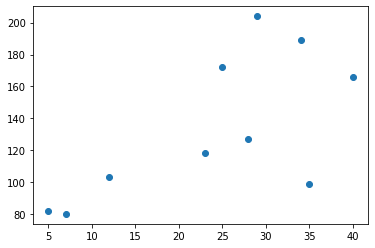

In [88]:
plt.scatter(x=df.Years,y=df.Salary)

#### The residual is the difference between y and f0 i.e. (y-f0)
##### We can use the residuals from F0(x) to create h1(x). h1(x) will be a regression tree which will try and reduce the residuals from the previous step. The output of h1(x) won’t be a prediction of y; instead, it will help in predicting the successive function F1(x) which will bring down the residuals.

In [89]:
df1 = df

The additive model h1(x) computes the mean of the residuals (y – F0) at each leaf of the tree. 

A split is done and the mean of upper part and lower part is calculated 
Here , I have selected a random split point

In [91]:
for i in range(2):
    f = df.Salary.mean()
    if(i>0):
        df['f'+str(i)] = df['f'+str(i-1)] + df['h'+str(i)]
    else:
        df['f'+str(i)] = f
    df['y-f'+str(i)] = df.Salary - df['f'+str(i)]
    splitIndex = np.random.randint(0,df.shape[0]-1)
    a= []
    h_upper = df['y-f'+str(i)][0:splitIndex].mean()
    h_bottom = df['y-f'+str(i)][splitIndex:].mean()
    for j in range(splitIndex):
        a.append(h_upper)
    for j in range(df.shape[0]-splitIndex):
        a.append(h_bottom)
    df['h'+str(i+1)] = a
    
df.head()


,Years,Salary,f0,y-f0,h1,f1,y-f1,h2
0,5,82,134.0,-52.0,0.0,134.0,-52.0,-45.666667
1,7,80,134.0,-54.0,0.0,134.0,-54.0,-45.666667
2,12,103,134.0,-31.0,0.0,134.0,-31.0,-45.666667
3,23,118,134.0,-16.0,0.0,134.0,-16.0,19.571429
4,25,172,134.0,38.0,0.0,134.0,38.0,19.571429


#### This is how the dataset looks after 2 iterations

If we continue to iterate for 100 times , we can see the Loss of MSE(Fi) decreasing by a huge margin

In [92]:
for i in range(100):
    f = df.Salary.mean()
    if(i>0):
        df['f'+str(i)] = df['f'+str(i-1)] + df['h'+str(i)]
    else:
        df['f'+str(i)] = f
    df['y-f'+str(i)] = df.Salary - df['f'+str(i)]
    splitIndex = np.random.randint(0,df.shape[0]-1)
    a= []
    h_upper = df['y-f'+str(i)][0:splitIndex].mean()
    h_bottom = df['y-f'+str(i)][splitIndex:].mean()
    for j in range(splitIndex):
        a.append(h_upper)
    for j in range(df.shape[0]-splitIndex):
        a.append(h_bottom)
    df['h'+str(i+1)] = a
    
df.head()


,Years,Salary,f0,y-f0,h1,f1,y-f1,h2,f2,y-f2,...,h97,f97,y-f97,h98,f98,y-f98,h99,f99,y-f99,h100
0,5,82,134.0,-52.0,-45.666667,88.333333,-6.333333,-9.473903e-15,88.333333,-6.333333,...,1.776357e-15,85.594638,-3.594638,-3.083745,82.510894,-0.510894,0.387978,82.898871,-0.898871,-0.898871
1,7,80,134.0,-54.0,-45.666667,88.333333,-8.333333,-9.473903e-15,88.333333,-8.333333,...,1.776357e-15,84.605788,-4.605788,-3.083745,81.522043,-1.522043,0.387978,81.910021,-1.910021,0.099875
2,12,103,134.0,-31.0,-45.666667,88.333333,14.666667,-9.473903e-15,88.333333,14.666667,...,1.776357e-15,97.285360,5.714640,-3.083745,94.201615,8.798385,0.387978,94.589593,8.410407,0.099875
3,23,118,134.0,-16.0,19.571429,153.571429,-35.571429,-1.218073e-14,153.571429,-35.571429,...,1.776357e-15,127.849193,-9.849193,-3.083745,124.765448,-6.765448,0.387978,125.153425,-7.153425,0.099875
4,25,172,134.0,38.0,19.571429,153.571429,18.428571,-1.218073e-14,153.571429,18.428571,...,1.776357e-15,157.370016,14.629984,2.055830,159.425846,12.574154,0.387978,159.813823,12.186177,0.099875


#### Following is the graph for Iteration 1 , 10 and 99
#### We can see the loss decreasing and the model adapting to the dataset as the iteration increases

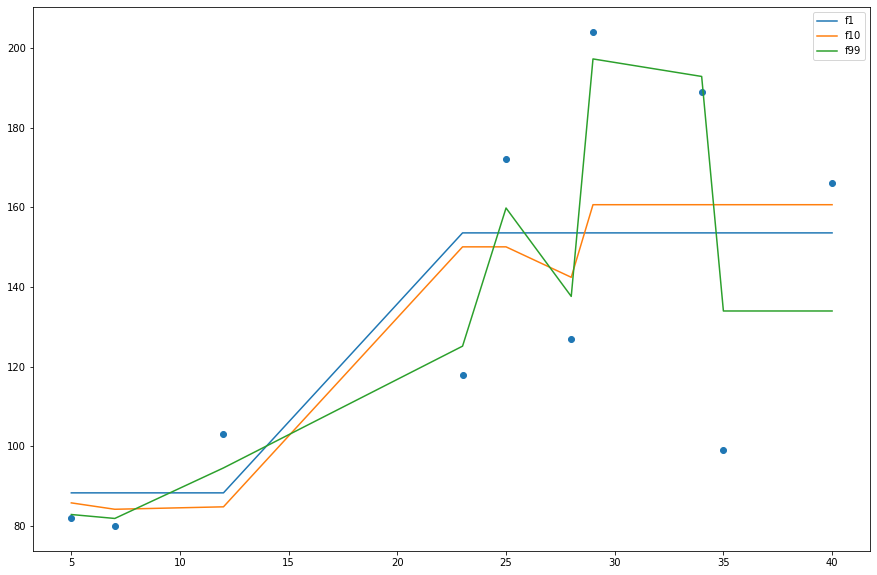

In [94]:
plt.figure(figsize=(15,10))
plt.scatter(df.Years,df.Salary)
plt.plot(df.Years,df.f1,label = 'f1')
plt.plot(df.Years,df.f10,label = 'f10')
plt.plot(df.Years,df.f99,label = 'f99')
plt.legend()

#                                               END